In [3]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [21]:

imdb_movies = pd.read_csv("imdb-movies.csv")

In [13]:
imdb_movies.shape

(10866, 21)

In [14]:
imdb_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [15]:
imdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

<Axes: xlabel='release_year'>

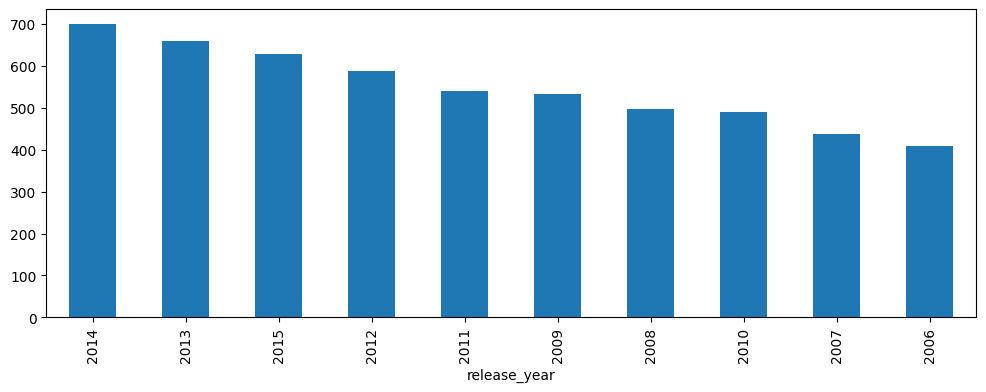

In [22]:
#Drawing bar graph based on top 10 years of most number of movies releases

imdb_movies['release_year'].value_counts().head(10).plot.bar(figsize=(12,4))

<Axes: title={'center': 'budget'}, xlabel='vote_average'>

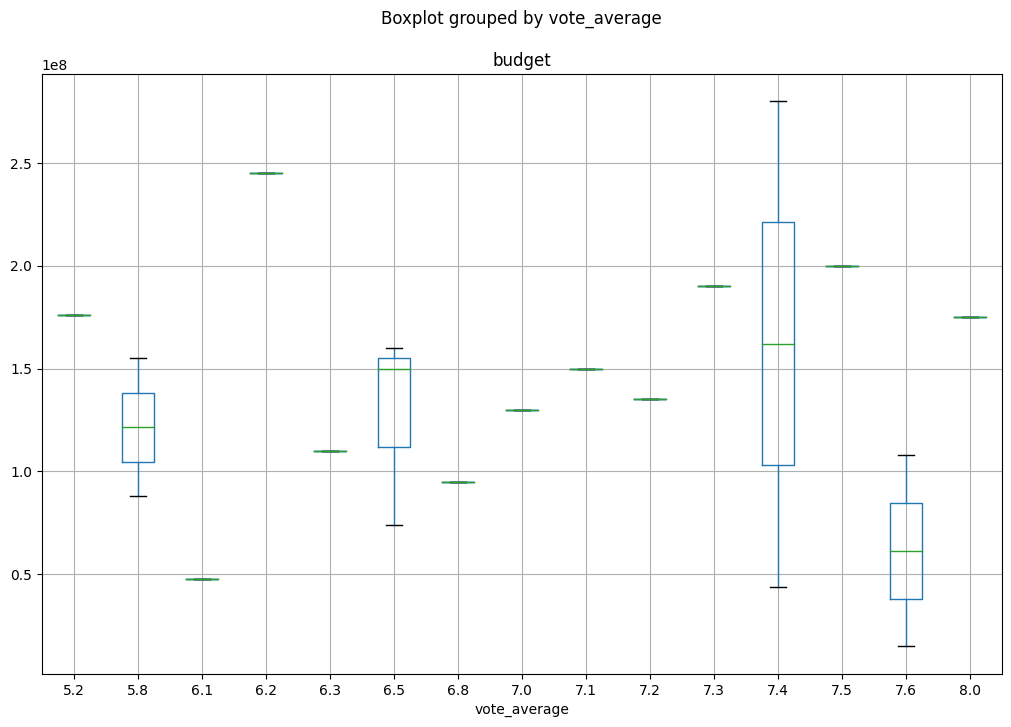

In [23]:
#Relationship between vote_rating and budget(using last 12 records)

imdb_movies.head(20).boxplot(column='budget', by='vote_average',figsize=(12,8))

<Axes: title={'center': 'revenue'}, xlabel='budget'>

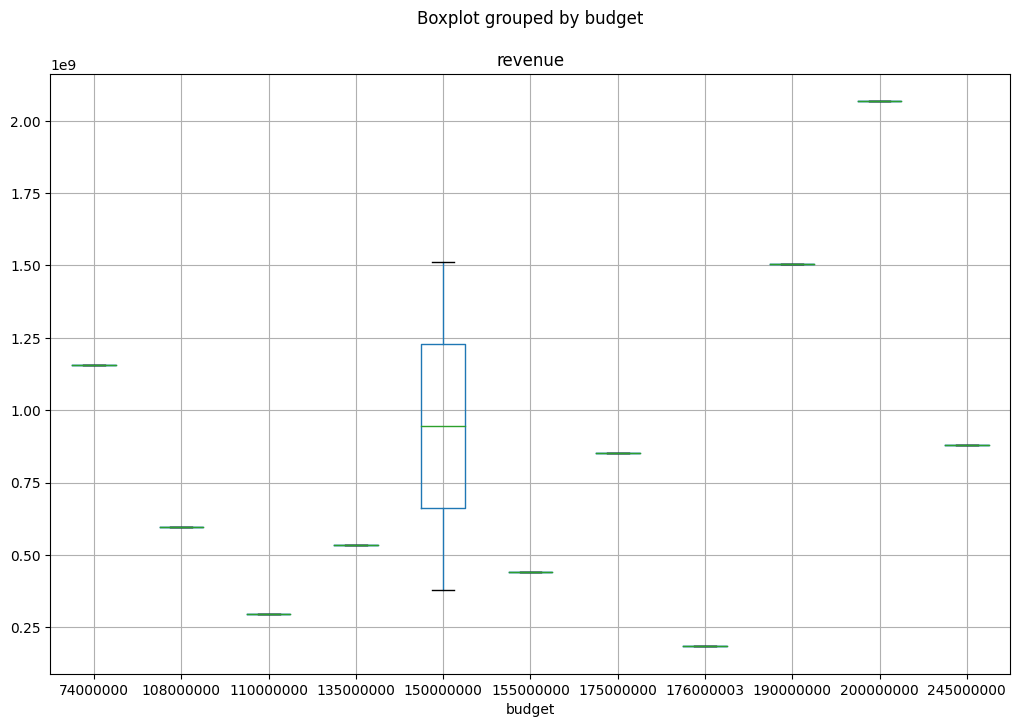

In [24]:
imdb_movies.head(12).boxplot(column='revenue',by='budget',figsize=(12,8))

In [25]:
#Top 10 Highest profit movies

#--adding new column to show the profit 
imdb_movies['profit']=imdb_movies.revenue-imdb_movies.budget

<Axes: xlabel='original_title'>

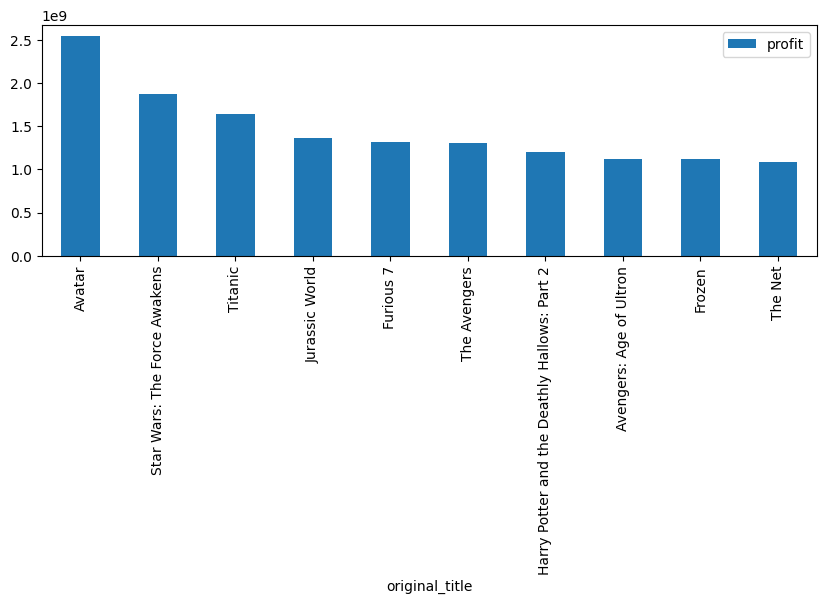

In [28]:
top10 = imdb_movies.nlargest(10,'profit')
top10.index = top10.original_title
top10[['original_title','profit']].plot.bar(figsize=(10,3))

<Axes: xlabel='director'>

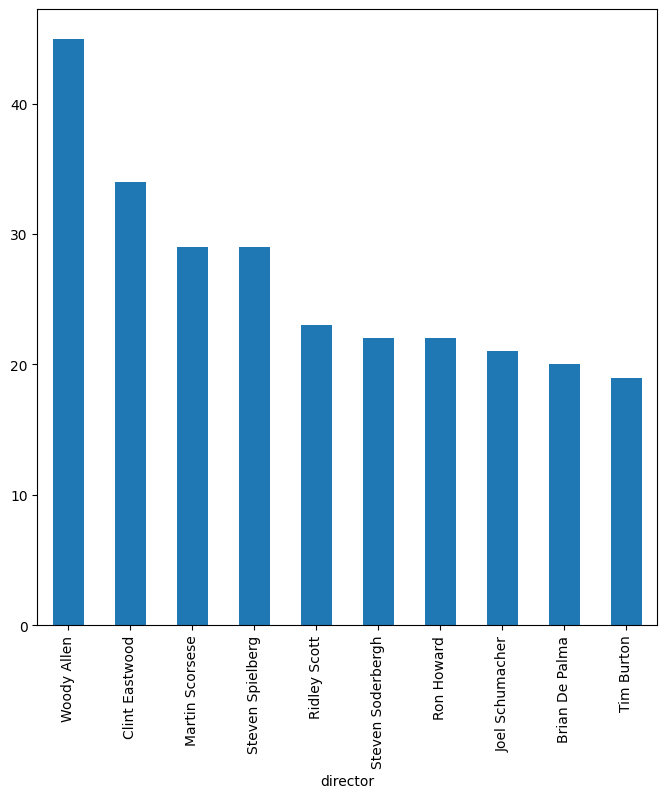

In [43]:
#Diectors with most number of movies.

imdb_movies.director.value_counts().head(10).plot.bar(figsize=(8,8))

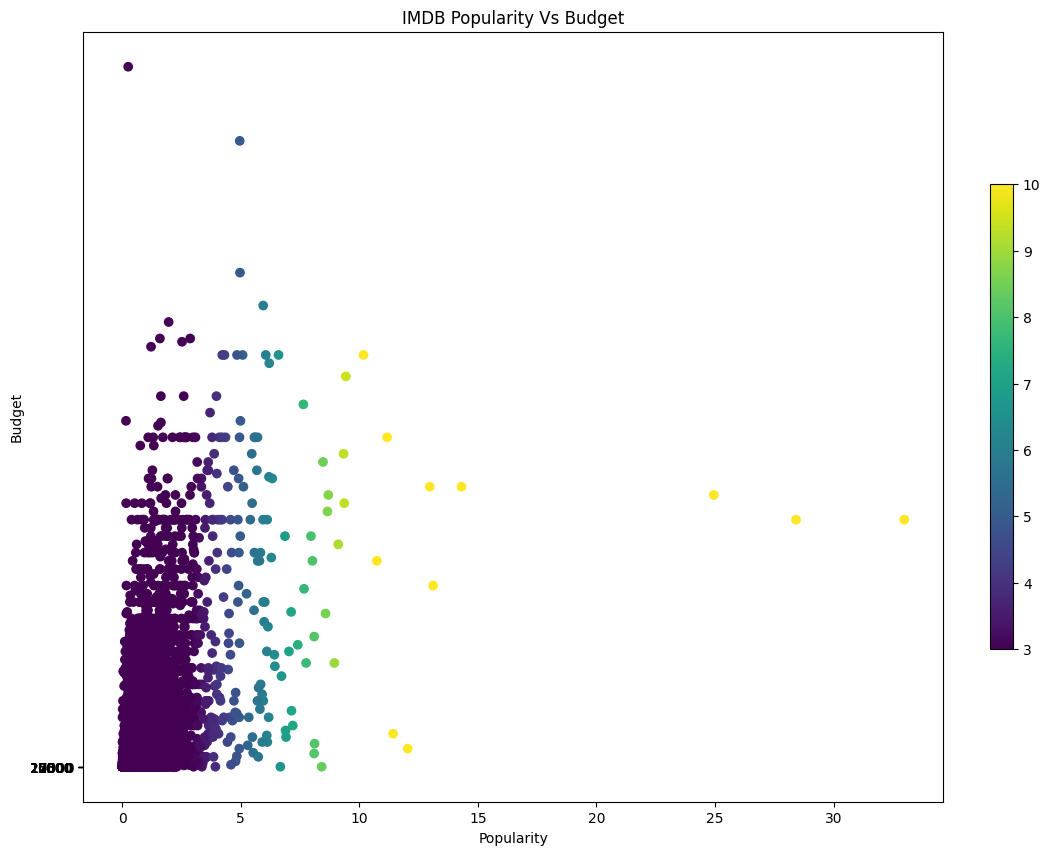

In [30]:
#Popularity Vs Budget

plt.figure(figsize=(12,10))
plt.title("IMDB Popularity Vs Budget")
plt.xlabel("Popularity")
plt.ylabel("Budget")
tmp=plt.scatter(imdb_movies.popularity,imdb_movies.budget,c=imdb_movies.popularity,vmin=3,vmax=10)
plt.yticks([i*2500 for i in range(11)])
plt.colorbar(tmp,fraction=.025)
plt.show()

In [31]:
top20ProfitMovies = imdb_movies.nlargest(20,'profit')


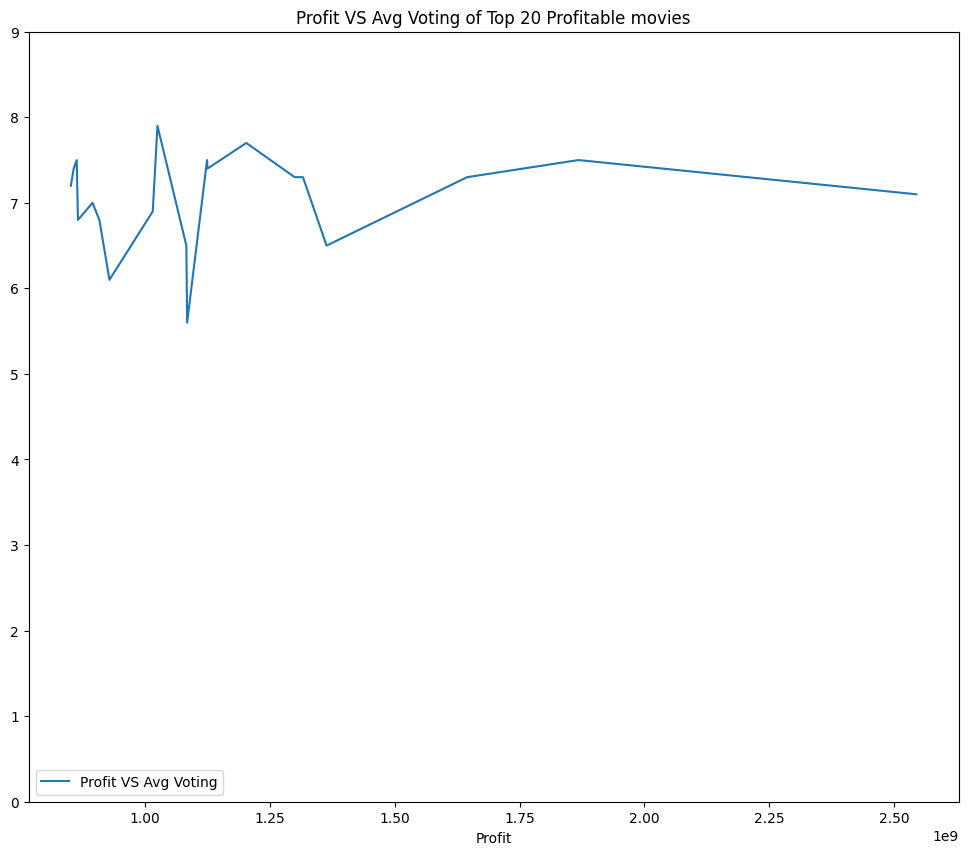

In [32]:
#Profit VS Average Voting

plt.figure(figsize=(12,10))
plt.title("Profit VS Avg Voting of Top 20 Profitable movies")
plt.xlabel('Profit')
plt.plot(top20ProfitMovies.profit,top20ProfitMovies.vote_average)
plt.legend(['Profit VS Avg Voting'],loc='lower left')
plt.yticks(range(10))
plt.show()

In [33]:
#No of Movie released in each Genres

arrayGenres = []
for i in imdb_movies.genres:
    if type(i) == str:
        for x in i.split('|'):
            arrayGenres.append(x)

In [34]:
from collections import Counter
dicGenresWithCounts = Counter(arrayGenres)

Text(0, 0.5, 'No of movies released')

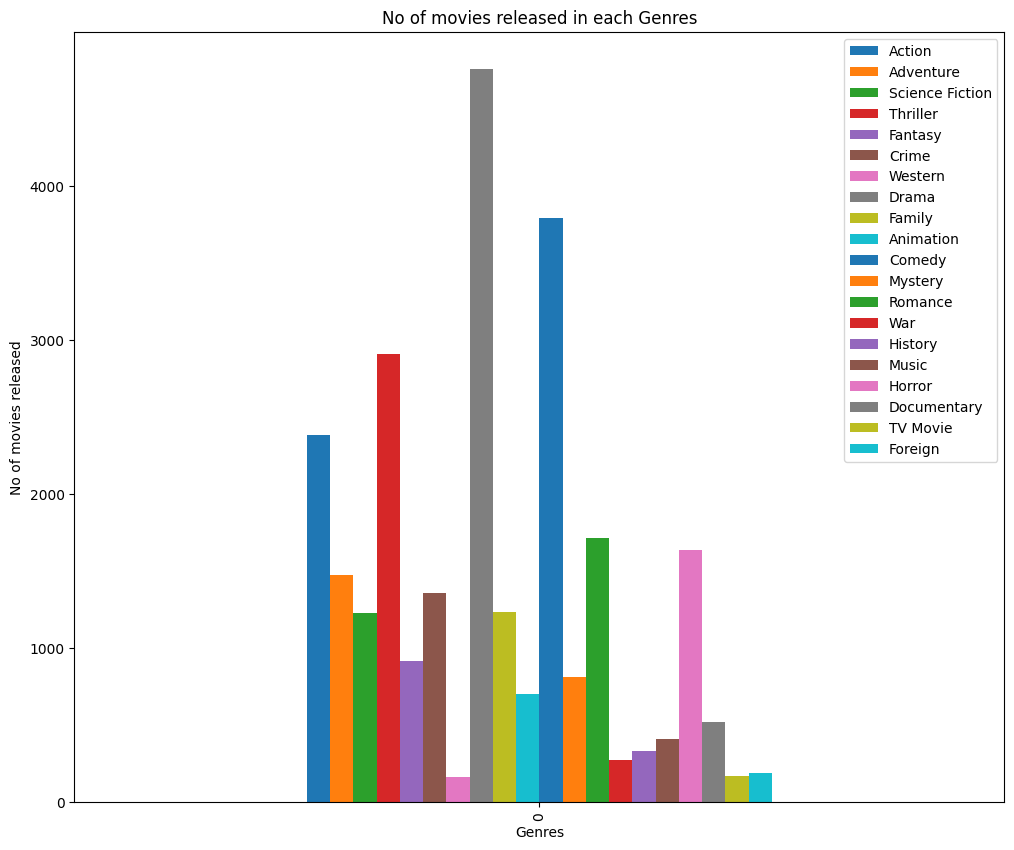

In [38]:
df=pd.DataFrame.from_dict([dicGenresWithCounts.values()])
df.columns=list(dicGenresWithCounts.keys())
df.plot.bar(figsize=(12,10))
plt.title("No of movies released in each Genres")
plt.xlabel("Genres")
plt.ylabel("No of movies released")

<Axes: ylabel='count'>

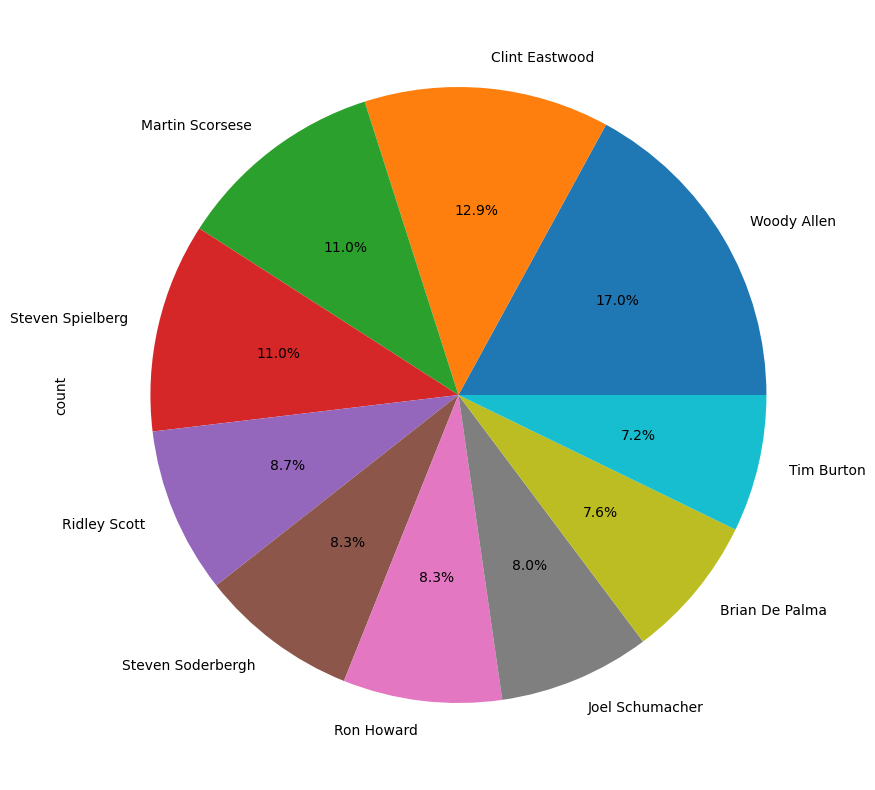

In [39]:
#Top 10 Directors

imdb_movies.director.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(12,10))

Text(0, 0.5, 'No of movies released')

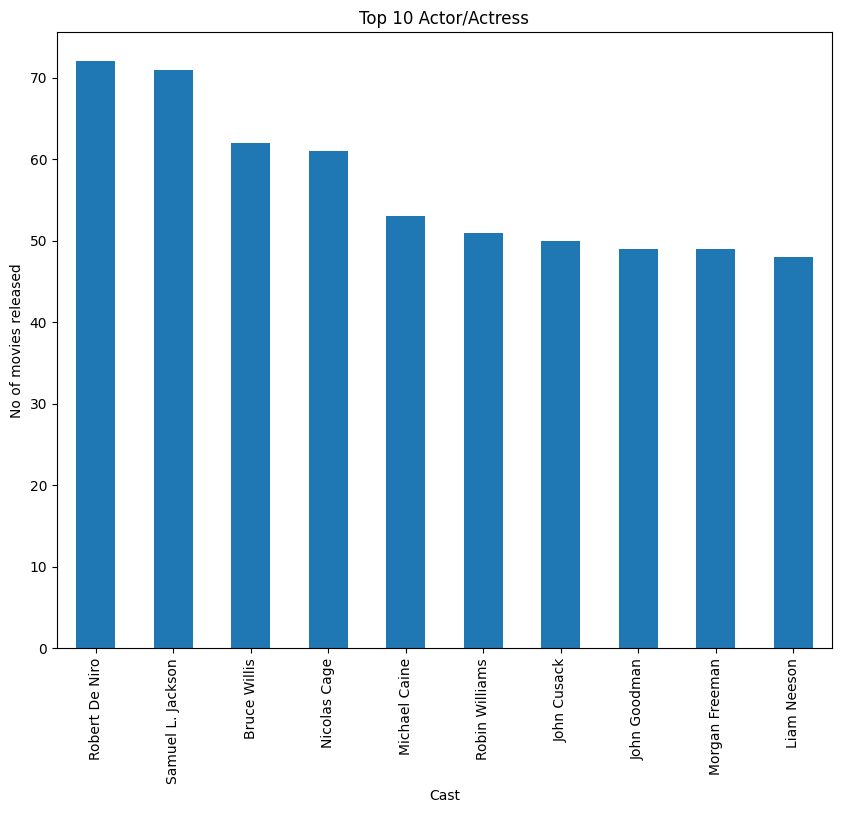

In [40]:
#Top 10 Actor/Actress

arrayCast = []
for i in imdb_movies.cast:
    if type(i) == str:
        for x in i.split('|'):
            arrayCast.append(x)
dicCastWithCounts = Counter(arrayCast)
df_Cast=pd.DataFrame(data={'Cast':list(dicCastWithCounts.keys()),'Count':list(dicCastWithCounts.values())}).sort_values(by='Count',ascending=False)
df_Cast.index = df_Cast.Cast
df_Cast.Count.head(10).plot.bar(figsize=(10,8))
plt.title("Top 10 Actor/Actress")
plt.xlabel("Cast")
plt.ylabel("No of movies released")

In [44]:
#IMDB movie data classification

#--Add new column and named it as 'IsProfitable',

imdb_movies['IsProfitable'] = imdb_movies.profit>(imdb_movies.budget*2)

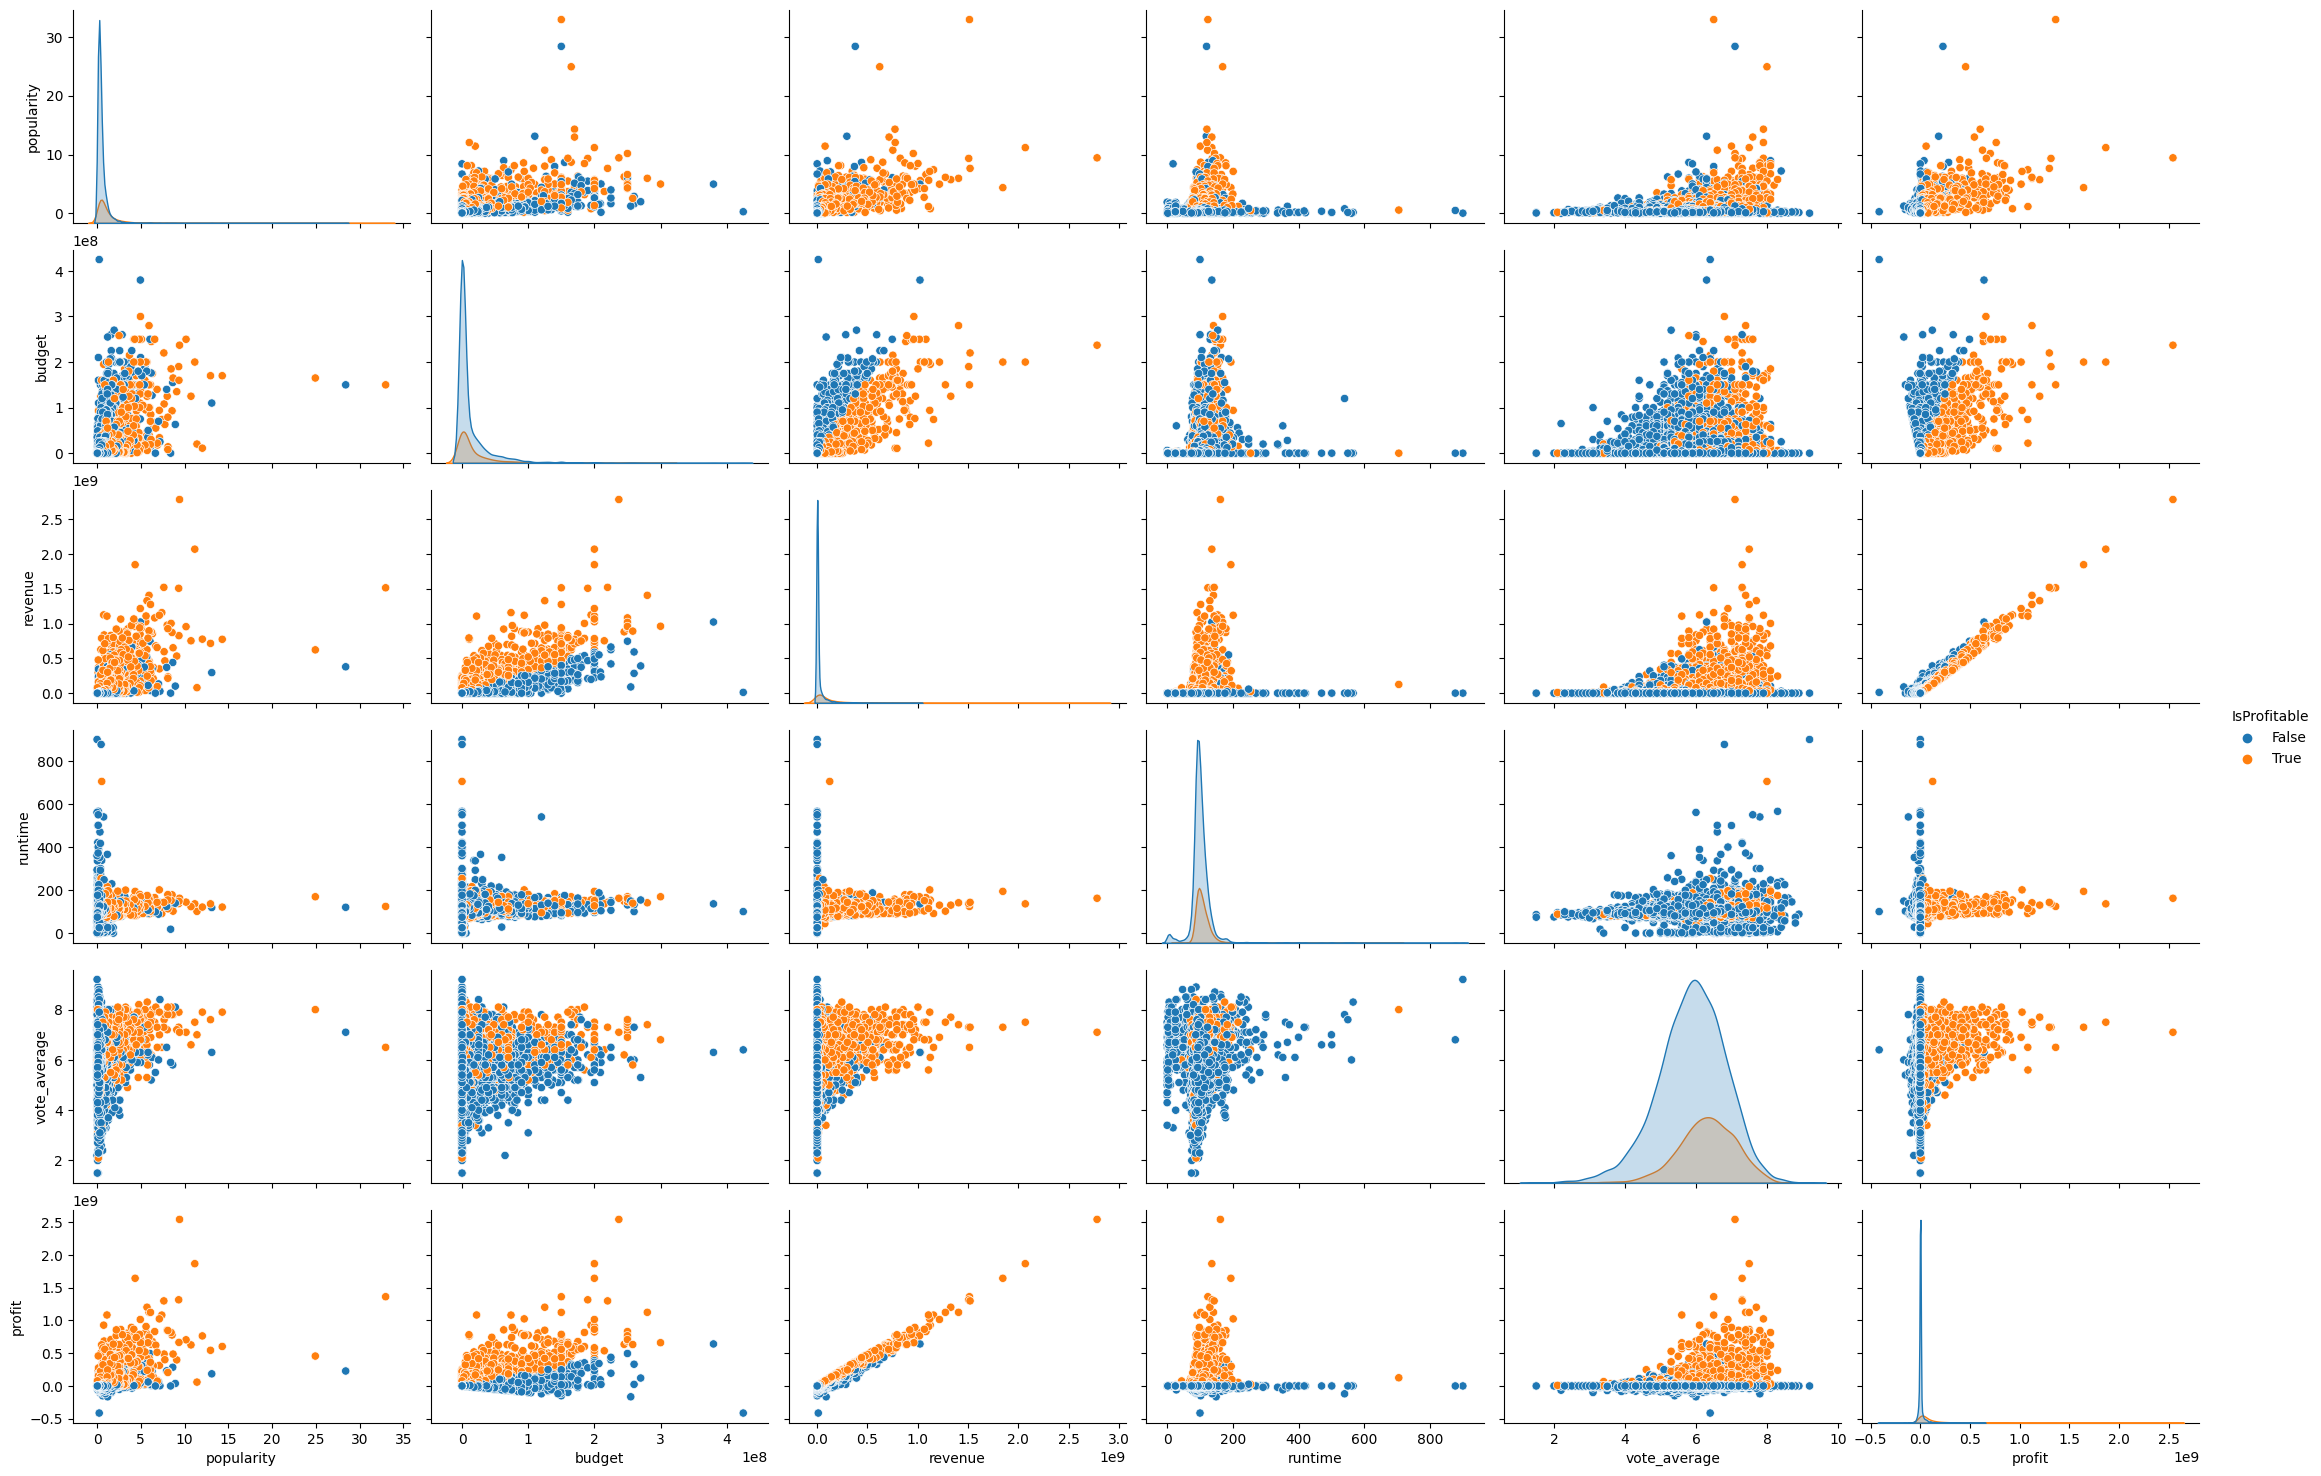

In [48]:
df_imp_data = imdb_movies.drop(['id','imdb_id','homepage', 'tagline','cast','keywords','overview','genres','production_companies','release_date','budget_adj','revenue_adj','release_year','original_title','vote_count','director'], axis=1)
df_imp_data
sns.pairplot(df_imp_data, hue='IsProfitable', aspect=1.5)
plt.show()